<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Нейронные сети и нейронные компьютеры» </font></center>
<br>

Выполнили:
- Болотенко Н.А.
- Левицкий А.В.

Проверил: Осипенко И.В.

<center>  Новосибирск, 2025  </center>


## Цель работы

Знакомство и освоение работы и исследование модели машинного обучения типа многослойный перцептрон(MLP) с использованием библиотеки Tensorflow.

# Ход работы

## Часть 1. Исследование MLP путём опроса отдельных слоёв


1. Ознакомится с базовыми понятиями
2. Определить какие  составные элементы и начальные параметры необходимы для создания НС

3. Исследование MLP путём опроса отдельных слоёв

  3.1. Разобрать базовый пример работы НС с последовательным опросом слоёв

  3.2. Получить вариант по Табл.1-3 (значения весовых коэфф., начальное значение `x`, тип функции активации)

  3.3 Изменить весовые коэфф. и начальное значение `x` базового примера

  3.4.  Зафиксировать как распространяется сигнал (процесс умножение матриц w_i*x_i) при изменённых входом значении и весовых коэфф. Зафиксировать их в отчёте.


## Часть 2. Исследование работы MLP для классификации изображений

1. Исследование работы MLP для классификации изображений

  1.1. Выбрать/получить вариант - вид изображений для ручного ввода из следующих:
  
      * геом. фигуры (круг, квадрат, ...)
      * римские цифры
      * арабские цифры
      * буквы алфавита (кириллица, латиница, арабские, ...)
      * смайлики
      * морзянка ( `-` Т, `.` Е,  `.-` А, `-.` Н, `..` И, `--` М  и т.д.)`
      * ваш вариант по согласованию (строительные инструменты, виды транспорта, и т.п.)

  1.2. Самостоятельно выбрать **минимум три класса** символов согласно варианту (пример: вид - геометрические фигуры, выбранные классы: круг, треугольник, крест) для дальнейшего создания изображений

  1.3. С помощью графического окна "Tkinter" создать **минимум 13** экземпляров каждого класса символа (по примеру выше: круг, треугольник, крест) и сохранить их на диск. Символ должен распологаться по центру изображения и занимать почти всю прощадь.

  1.4. Создать в папке с изображениями './imgs', вложенные подпапки для классов выбранных символов. Названия подпапок классов должны быть в виде целых чисел начиная с нуля (0,1,2,...). Распределить сохранённые ранее изображения по подпапкам классов (Полный путь к папке не должен содерджать кириллицу).

  1.5.Выбрать структуру№1 и зафиксировать параметры№1 НС для распознавания изображений. Создать экземпляр НС с помощью библиотеки tensorflow.

  1.6. Провести процедуру последовательного обучения НС, на каждой итерации:
      * предъявлять изображения по одиночке, чередуя символы экземпляров
      * фиксировать текущую величину функции потерь (Loss) и порядковый номер обучения (эпохи)

  1.7. Построить график истории изменения функции потерь (Loss) по по эпохам

  1.8. Выбрать структуру№2 и зафиксировать параметры№2 отличающуюся от структуры в п. 1.4. Повторить обучение согласно п. 1.5.

  1.9. Сравнить графики изменения функции потерь для НС различной структуры.
  
2. Проанализировать результаты работы. Отметить сходства и различия в результатах, сделать выводы о предполагаемых причинах.

**Таблица 1. Значения весовых коэфф.**

| Вариант | w1_1    | b1_1  | w1_2   | b1_2  | w1_3   | b1_3   |-|  w2_1  | w2_2  | w2_3  | b2_1    |
| ------- | ------- | ----- | ------ | ----- | ------ | ------ | - |  -------------- | ----- | ----- | ----- |
| A       | 5.0     | 0.0   |  -10.0 |  -5.0 |  -3.0  | 0.0    |\||  0.6            | 0.2   |  -0.1 | 0.0   |
| B       | 10.0    | 7.0   | 20.0   |  -3.0 |  -10.0 | 7.0    |\||   -1.5          | 2.0   | 1.0   | 0.0   |
| C       | 7.0     | 5.0   | 10.0   |  -1.0 | 13.0   |  -5.0  |\||  0.9            |  -0.5 | 0.8   | 0.0   |
| D       | 1.0     | 0.0   | 8.0    | 0.0   | 3.0    | 0.0    |\||  0.5            | 1.1   |  -1.9 | 1.0   |
| E       | 5.0     | 0.0   | 20.0   | 0.0   | 20.0   |  -10.0 |\||  0.5            |  -0.8 |  -0.9 | 2.0   |
| F       | 10.0    | 0.0   | 20.0   | 10.0  |  -10.0 | 0.0    |\||  0.9            | 1.7   | 1.1   |  -1.1 |
| G       |  -15.0  | 7.0   |  -10.0 |  -3.0 |  -10.0 | 7.0    |\||   -2.0          | 1.0   | 2.0   | 0.0   |
| H       | 13.0    |  -5.0 | 15.0   | 7.0   | 18.0   | 5.0    |\||  1.0            | 1.0   |  -1.0 | 0.0   |


**Таблица 2. Значения входного сигнала `x`**

| Вариант| 1     |  2    |  3    |  4    |  5    | 6    | 7    | 8    | 9    | 10   | 11   |
| --     | --    | --    | --    |  --   |  --   | --   | --   | --   | --   | --   | --   |
|x       | -0.50 | -0.40 | -0.30 | -0.20 | -0.10 | 0.00 | 0.10 | 0.20 | 0.30 | 0.40 | 0.50 |


**Таблица 3. Тип функции активации**

| Вариант Ф.А. |
| ------ |
| sigmoid  |
| tanh  |
| silu  |
| mish  |
| leaky_relu  |









## Основная часть
---

### Подключение пакетов

Перед началом работы нужно убедиться, что необходимые для работы пакеты установлены в системе.

In [ ]:
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")

In [ ]:

import pandas as pd
import numpy  as np

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

import tensorflow as tf
from IPython.display import clear_output
import plotly.graph_objects as go

import PIL
from PIL import ImageTk, Image, ImageDraw, ImageOps

import tkinter as tk
import datetime
import os
import re

In [ ]:
from random import random, randint

### Часть 1. Исследование MLP путём опроса отдельных слоёв 

1. Ознакомится с базовыми понятиями
2. Определить какие  составные элементы и начальные параметры необходимы для создания НС

3. Исследование MLP путём опроса отдельных слоёв

3.1. Разобрать базовый пример работы НС с последовательным опросом слоёв

3.2. Получить вариант по Табл.1-3 (значения весовых коэфф., начальное значение `x`, тип функции активации)

3.3 Изменить весовые коэфф. и начальное значение `x` базового примера

3.4.  Зафиксировать как распространяется сигнал (процесс умножение матриц w_i*x_i) при изменённых входом значении и весовых коэфф. Зафиксировать их в отчёте.


Создадим НС 1-3-Sigmoid-1

In [ ]:
m1 = tf.keras.models.Sequential()
m1.add(tf.keras.layers.Input(shape=(1,)))
m1.add(tf.keras.layers.Dense(units=3, activation=None))
m1.add(tf.keras.layers.Activation(activation=tf.keras.activations.sigmoid))
m1.add(tf.keras.layers.Dense(units=1, activation=None))

In [ ]:
fLoss      = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
fMetric  = [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
]

In [ ]:
m1.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

print("Вывод короткой информации о структуре НС")
print(m1.summary())

In [ ]:
m1.layers

In [ ]:
for layer in m1.layers:
  print(f'{"#"*100}')
  print(f"#### Имя слоя:{layer.name};  Тип слоя: {layer.__class__} ##########", end='')
  print(f"\nВид ф-ии активации слоя: {layer.get_config()['activation']}", end='')
  print(f"\nКол-во ВХодов  слоя: {layer.input.shape[1]}", end='')
  print(f"\nКол-во ВЫХодов слоя: {layer.output.shape[1]}", end='')
  if type(layer) is tf.keras.layers.Dense:
    print(f"\nКол-во нейронов слоя:    {layer.get_config()['units']}", end='')
    print(f"\n\nВесовые коэфф. weight_i_j=\n{layer.weights[0].numpy()}")
    print(f"\nВесовые коэфф. bias_i_j=\n{layer.bias.numpy()}")
  elif type(layer) is tf.keras.layers.Activation:
    pass
  print('\n')

Вариантом заданы следующие веса

| Вариант | w1_1    | b1_1  | w1_2   | b1_2  | w1_3   | b1_3   | - |  w2_1  | w2_2  | w2_3  | b2_1    |
| ------- | ------- | ----- | ------ | ----- | ------ | ------ | - | -------------- | ----- | ----- | ----- |
| C       | 7.0     | 5.0   | 10.0   |  -1.0 | 13.0   |  -5.0  | - |  0.9           |  -0.5 | 0.8   | 0.0   |

In [ ]:
w11=7
b11=5
w12=10
b12=-1
w13=13
b13=-5

w21=0.9
w22=-0.5
w23=0.8
b21=0

l1_w=np.array([[w11, w12, w13]])
l1_b=np.array([b11, b12, b13])

l2_w=np.array([[w21], [w22], [w23]])
l2_b=np.array([b21])

In [ ]:
m1.layers[0].set_weights(
    [
       l1_w, # w_i
       l1_b  # b_i
    ]
)

m1.layers[2].set_weights(
    [
       l2_w, # w_i
       l2_b  # b_i
    ]
)

In [ ]:
for layer in m1.layers:
  print(f'{"#"*100}')
  print(f"#### Имя слоя:{layer.name};  Тип слоя: {layer.__class__} ##########", end='')
  print(f"\nВид ф-ии активации слоя: {layer.get_config()['activation']}", end='')
  print(f"\nКол-во ВХодов  слоя: {layer.input.shape[1]}", end='')
  print(f"\nКол-во ВЫХодов слоя: {layer.output.shape[1]}", end='')
  if type(layer) is tf.keras.layers.Dense:
    print(f"\nКол-во нейронов слоя:    {layer.get_config()['units']}", end='')
    print(f"\n\nВесовые коэфф. weight_i_j=\n{layer.weights[0].numpy()}")
    print(f"\nВесовые коэфф. bias_i_j=\n{layer.bias.numpy()}")
  elif type(layer) is tf.keras.layers.Activation:
    pass
  print('\n')

In [ ]:
m1.get_weights()

In [ ]:
print(f"Кол-во ВХодов слоя #0.Linear: {m1.layers[0].input.shape[1]}")

Зададим входное значение

In [ ]:
x=-0.4
xx = np.array([[x]])
print(xx)

In [ ]:
def l_info(model : tf.keras.Model, l_n : int, x_arr : float, name : str) -> float:
    y_layer = model.layers[l_n](x_arr)
    print(f"Кол-во ВЫХодов слоя #{l_n}.{name}: {model.layers[l_n].output.shape[1]}")
    print(f"Выходные значения слоя #{l_n}.{name} при входном значении {np.round(x_arr,2)}:\n  {y_layer}")
    return y_layer

y_layer0=l_info(m1, 0, xx, "Linear")

Явно вычислим промежуточные сигналы

In [ ]:
def l_dense(x, l_w, l_b):
    x_t = x * l_w + l_b
    return x_t

x11, x12, x13 = l_dense(x, l1_w[0], l1_b)
print("x11 =", x11)
print("x12 =", x12)
print("x13 =", x13)

In [ ]:
y_layer1=l_info(m1, 1, y_layer0, "ActFunc")

In [ ]:
def l_act(x, func):
    a_t = func(x).numpy()
    return a_t

a1, a2, a3 = l_act([x11, x12, x13], tf.keras.activations.sigmoid)

print("a1 =", a1)
print("a2 =", a2)
print("a3 =", a3)

In [ ]:
y_out=l_info(m1, 2, y_layer1, "Linear")

In [ ]:
def out(x, l_w, l_b):
    x_t=x * l_w.T
    y=np.sum(x_t) + l_b
    return y

In [ ]:
y = out([a1, a2, a3], l2_w, l2_b)

x21=a1 * w21
x22=a2 * w22
x23=a3 * w23

print("x21 =", x21)
print("x22 =", x22)
print("x23 =", x23)
print("y=", y)

Изменим параметры сети и проведлем ту же цепочку действий

In [ ]:
l1_rw=l1_w*random()
l1_rb=l1_b*random()

l2_rw=l2_w*random()
l2_rb=l2_b*random() if l2_b != 0 else np.array([random()])

In [ ]:
print("l1_w=", l1_rw)
print("l1_b=", l1_rb)
print("l2_w=", l2_rw)
print("l2_b=", l2_rb)

Вторая модель

In [ ]:
m2 = tf.keras.models.Sequential()
m2.add(tf.keras.layers.Input(shape=(1,)))
m2.add(tf.keras.layers.Dense(units=3, activation=None))
m2.add(tf.keras.layers.Activation(activation=tf.keras.activations.sigmoid))
m2.add(tf.keras.layers.Dense(units=1, activation=None))

In [ ]:
m2.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

print("Вывод короткой информации о структуре НС")
print(m2.summary())

In [ ]:
m2.layers[0].set_weights(
    [
       l1_rw, # w_i
       l1_rb  # b_i
    ]
)

m2.layers[2].set_weights(
    [
       l2_rw, # w_i
       l2_rb  # b_i
    ]
)

In [ ]:
x2 = x*random()
xx2 = np.array([[x2]])

In [ ]:
for layer in m2.layers:
  print(f'{"#"*100}')
  print(f"#### Имя слоя:{layer.name};  Тип слоя: {layer.__class__} ##########", end='')
  print(f"\nВид ф-ии активации слоя: {layer.get_config()['activation']}", end='')
  print(f"\nКол-во ВХодов  слоя: {layer.input.shape[1]}", end='')
  print(f"\nКол-во ВЫХодов слоя: {layer.output.shape[1]}", end='')
  if type(layer) is tf.keras.layers.Dense:
    print(f"\nКол-во нейронов слоя:    {layer.get_config()['units']}", end='')
    print(f"\n\nВесовые коэфф. weight_i_j=\n{layer.weights[0].numpy()}")
    print(f"\nВесовые коэфф. bias_i_j=\n{layer.bias.numpy()}")
  elif type(layer) is tf.keras.layers.Activation:
    pass
  print('\n')

Вычисления следующие

In [ ]:
yr_layer0=l_info(m2, 0, xx2, "Linear")
print("\n")

xr11, xr12, xr13 = l_dense(x2, l1_rw[0], l1_rb)
print("x11 =", xr11)
print("x12 =", xr12)
print("x13 =", xr13)
print("\n")

yr_layer1=l_info(m2, 1, yr_layer0, "ActFunc")
print("\n")

ar1, ar2, ar3 = l_act(yr_layer0[0], tf.keras.activations.sigmoid)
print("a1 =", ar1)
print("a2 =", ar2)
print("a3 =", ar3)
print("\n")

yr_out=l_info(m2, 2, yr_layer1, "Linear")
print("\n")

yr = out(yr_layer1[0], l2_rw, l2_rb)
print("y=", yr)

In [ ]:
print(y)
print(m1.predict(xx))
print("\n")
print(yr)
print(m2.predict(xx2))

In [ ]:
xv = np.array(
    [
        [ -500 ],
        [ 0.0 ],
        [ 1.0 ],
        [ 1.1 ],
        [ 1.2 ],
        [ 1.3 ],
        [ 1.4 ],
        [ 1.5 ],
        [ 500 ]
    ])
m1.predict(xv)

In [ ]:
yv_layer0=m1.layers[0](xv)
yv_layer1=m1.layers[1](yv_layer0)
yv_out=m1.layers[2](yv_layer1)
print(yv_out)

# Часть 2. Исследование работы MLP для классификации изображений

Объявим переменную `pathFotImgs` с названием для новой папки, в которую будут сохранены изображения и из которой они будут загружены позднее.

In [ ]:
pathFotImgs = 'datasets/old'

## Создание изображений

### Tkinter

Следующий код подготовит отдельное графическое окно с областью для рисования.

In [ ]:
class myWinTK ():
    ''' Класс графического окна для рисования изображений '''

    def getImage(self):
        _image = Image.fromarray( self.output_numpy*255.0, ).convert( mode='1') #  преобразовать к массиву значений, конвертировать в черно/белый
        #_image = _image.resize((self.widthSave, self.heightSave), PIL.Image.BILINEAR)  # привести к размеру
        #print(f'getImage  {_image.size}, type {type(_image)})
        return _image

    def saveToFileFunc(self):
        ''' сохранить изображение '''
        self.savedImgsCounter +=1
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
        filename = f'img_{timestamp}'
        filepathBig   = os.path.join(self.pathFotImgs,   '_smallResizedFromBig_'+filename+'.png')
        filepathSmall = os.path.join(self.pathFotImgs, f'[{self.widthSave},{self.heightSave}]'              +filename+'.png')

        _saved_image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        _saved_image.save(filepathSmall, quality=100, subsampling=0) # сохранить
        print(f"- {self.savedImgsCounter}. Image saved {filepathSmall}")


    def drawGrid(self, workCanvas):
        # нанести сетку только для окна рисования (не применяется к финальному изображению)
        for ih in range(0, self.heightGUI//self.gridSize): # по высоте горизонтальные
            workCanvas.create_line(0,                 self.gridSize*ih*1, self.widthGUI,      self.gridSize*ih*1, fill='#555555')
        for iw in range(0 ,self.widthGUI//self.gridSize): # по ширине вертикальные
            workCanvas.create_line(self.gridSize*iw*1,                 0, self.gridSize*iw*1, self.heightGUI,     fill='#555555')

    def clearFunc(self):
        ''' очистить поле '''
        self.output_numpy[:] = 0
        self.draw.rectangle((0, 0, self.widthGUI, self.heightGUI), fill=(0, 0, 0, 0))
        self.canvasTk.delete("all")
        self.canvasTk.create_rectangle(0, 0, self.widthGUI, self.heightGUI, fill='black')
        self.drawGrid(workCanvas = self.canvasTk)
        if self.modelForPredictTensorflow is not None:
            self.T.delete('1.0', tk.END)
        if self.modelForPredictHopfield is not None:
            self.canvasHopfieldOut.delete("all")
            self.drawGrid(workCanvas = self.canvasHopfieldOut)

    def calcXY(self,nx,ny):
        grxScaled=nx*self.gridSize # масштабирование до видимого интерфейса
        gryScaled=ny*self.gridSize
        x1, y1 = grxScaled, gryScaled # вычисление углов масштабированого пикселя для до видимого интерфейса
        x2, y2 = (grxScaled + self.gridSize), (gryScaled + self.gridSize)
        return x1, y1, x2, y2

    def paintFunc(self,event):
        ''' нанести точку '''
        if  event.x>= self.widthGUI or event.y >=self.heightGUI :      return
        grx=event.x//self.gridSize # округление до номера клеток
        gry=event.y//self.gridSize
        x1, y1, x2, y2 = self.calcXY(nx=grx,ny=gry)

        colorName= None
        if event.num == 1 or event.state==264 or event.state==296 or event.state==272 or event.state==256:
            colorName = "white"
            colorBinary = 1
        elif event.num == 3 or event.state==1032 or event.state==1064 or event.state==1040 or event.state==1024:
            colorName = "black"
            colorBinary = 0

        if colorName:
            # видимый интерфейс
            self.canvasTk.create_rectangle(x1, y1, x2, y2, fill=colorName, width=1) #gridSize-1
            # полотно для сохранения
            self.draw.rectangle((x1, y1, x2, y2), fill=(255, 255, 255, 0))
            self.output_numpy[gry, grx] = colorBinary
        else:
            print('mouse event failed', event, event.state)


    def predictFromDraw(self):
        ''' Подать изображение с полотна на вход модели НС для классификаии '''
        _image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        numpy_array = np.array(_image, dtype=float)

        # Опрос модели
        # Переупаковка единственного изображения для подачи на вход НС
        numpy_array = numpy_array.reshape(1, self.widthSave, self.heightSave)
        #print("predictFromDraw:", numpy_array.shape)

        # Вызов ф. predict - вычисление одиночного ответа
        y_pred = self.modelForPredictTensorflow.predict(numpy_array)
        maxProbClassInd = tf.argmax(y_pred, axis=1).numpy()[0]
        if self.classNames!=None:  maxProbClass = self.classNames[maxProbClassInd]
        else:                      maxProbClass = maxProbClassInd

        # Вывод ответа в текстовое поле
        self.T.delete('1.0', tk.END)
        self.T.insert(tk.END,f'NN answers\n(closest class_{maxProbClass}):\n')

        for i, probability in enumerate(y_pred[0]):
            if self.classNames!=None:  yClassName_i = self.classNames[i]
            else: yClassName_i = i
            self.T.insert(tk.END, f'  est class_{yClassName_i}: {probability:>7.1%}\n' )

    def hopfieldNetFunc(self):
        _image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        numpy_array = np.array(_image, dtype=float)
        numpy_array[numpy_array==0]=-1

        # Получить ответ
        out = self.modelForPredictHopfield.sim(
                                                input=numpy_array.reshape(1,-1) )
        out = out.reshape(numpy_array.shape[0],numpy_array.shape[1]) # приведение к массива размерности (H*W,) к (H,W)

        self.canvasHopfieldOut.delete("all") # очистить поле рисования второго окна

        for (col,row), val in np.ndenumerate( out ): # отобразить графически ответ НС - уставноить цвет областей "пикселей"
            if val==1:
                x1, y1, x2, y2 = self.calcXY(nx=row,ny=col)
                self.canvasHopfieldOut.create_rectangle(x1, y1, x2, y2, fill='white', width=1) #gridSize-1

        self.drawGrid(workCanvas = self.canvasHopfieldOut) # нанести сетку


    def __init__(self, imgW=50, ImgH=50, gridSize=None, modelTensorflow=None, modelHopfield=None, pathFotImgs = 'imgs', classNames=None):
        '''
        imgW=50, ImgH=50  - размер выходного сохраняемого изображения, в пикселях
        gridSize=None - размер пикселя-клетки при рисовании в графическом интрфейсе
        modelTensorflow = None - обученная модель TensorFlow для классификации
        modelHopfield   = None - обученная модель библиотеки neurolab
        pathFotImgs     = 'imgs' - путь для сохранения изображений
        classNames      = None -  список названий классов
        '''
        self.savedImgsCounter=0
        self.widthSave, self.heightSave = imgW, ImgH
        self.gridSize    = gridSize
        if self.gridSize is None:
            maxSide = max(self.widthSave, self.heightSave)
            if maxSide<10: self.gridSize = 300//maxSide
            else:          self.gridSize = 400//maxSide
        self.widthGUI,  self.heightGUI  = self.widthSave*self.gridSize, self.heightSave*self.gridSize  #размер видимого окна
        print(f'Img size WхH = {self.widthSave}х{self.heightSave} px')

        self.output_image    = PIL.Image.new("RGB", (self.widthGUI, self.heightGUI), (0,0,0)) # PIL Изображение
        self.draw            = PIL.ImageDraw.Draw(self.output_image)                          # поле для рисования
        self.output_numpy = np.zeros((self.heightSave, self.widthSave,),dtype=int)         # массив для значений пикселей

        # Графический интерфейс
        rootWindow = tk.Tk() # основное окно
        self.canvasTk = tk.Canvas(rootWindow, width=self.widthGUI, height=self.heightGUI, bg='black')
        self.canvasTk.bind("<B1-Motion>", self.paintFunc)
        self.canvasTk.bind("<B3-Motion>", self.paintFunc)
        self.canvasTk.bind("<Button-1>",  self.paintFunc)
        self.canvasTk.bind("<Button-3>",  self.paintFunc)
        self.canvasTk.pack(expand=tk.YES, fill=tk.BOTH)
        self.drawGrid(workCanvas = self.canvasTk)

        self.canvasHopfieldOut=None # поле для рисования второго окна для вывода ответов НС Хопфилда

        self.modelForPredictTensorflow = modelTensorflow # объекты обученных НС для получения ответов
        self.modelForPredictHopfield   = modelHopfield
        self.classNames = classNames

        # Элементы интерфейса в зависимости от режима
        if self.modelForPredictTensorflow is not None:
            print('MODE: est class to img')
            buttonPredict=tk.Button(text="Estimate",command=self.predictFromDraw)
            buttonPredict.config(bg='#CCCCFF')
            buttonPredict.pack()
            self.T = tk.Text(rootWindow, height = 14, width = 35)
            self.T.pack()
        elif self.modelForPredictHopfield is not None:
            print('MODE: Hopfield net')
            buttonHopfieldNet=tk.Button(text="Est by Hopfield net",command=self.hopfieldNetFunc)
            buttonHopfieldNet.config(bg='#CCCCFF')
            buttonHopfieldNet.pack()
            hopfielWindow = tk.Toplevel() # второе окно для вывода ответов НС Хопфилда
            hopfielWindow.title("Hopfield net answer")
            hopfielWindow.attributes("-topmost",True) # видимость: окно появится на переднем плане, поверх всех других
            self.canvasHopfieldOut = tk.Canvas(hopfielWindow, width=self.widthGUI, height=self.heightGUI, bg='black') # объекты обученных НС для получения ответов
            self.canvasHopfieldOut.pack()
            self.drawGrid(workCanvas = self.canvasHopfieldOut)
        else:
            print('MODE: Draw and save')
            # Проверка наличия и создание директории для изображений
            self.pathFotImgs = pathFotImgs
            print('Save to path: ', end='')
            if not os.path.exists(self.pathFotImgs):
                os.mkdir(self.pathFotImgs)
                print(f"Created {os.path.join(os.getcwd(), self.pathFotImgs)}")
            else:
                print(f"Found {os.path.join(os.getcwd(), self.pathFotImgs)}")

            buttonSave=tk.Button(text="Save as",command=self.saveToFileFunc)
            buttonSave.config(bg='#CCFFCC')
            buttonSave.pack()
        buttonClear=tk.Button(text="Clear",command=self.clearFunc)
        buttonClear.config(bg='#FFCCCC')
        buttonClear.pack()
        my_label = tk.Label(rootWindow, text = "Close the window when finished!")   #  , font= ('Aerial', 17))
        my_label.pack()

        #----------------------------
        rootWindow.title("Drawing region")
        rootWindow.attributes("-topmost",True) # видимость: окно появится на переднем плане, поверх всех других
        rootWindow.resizable(False, False)
        rootWindow.mainloop()                  # отобразить окно

Выполнение следующей команды создаст и отобразит графическое окно.

 - При нажатии на кнопку "Сохранить" содержимое окна будет сохранено в файл-изображение во вложенную папку "./imgs".  
 - Левая кнопка мыши задаёт белый цвет клетки
 - Правая кнопка мыши задаёт чёрный цвет клетки

In [ ]:
myWinTK (
    imgW=28, ImgH=28, # размер выходного сохраняемого изображения, в пикселях
    pathFotImgs= pathFotImgs,
)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Подготовка данных

### Формирование набора данных с разделением на классы

In [ ]:
fullPathFotImgs =  os.path.join(os.getcwd(), pathFotImgs)
print(f'Путь к директории  "{pathFotImgs}"')
print(f'Полный путь к директории  "{fullPathFotImgs}"')
assert not bool(re.search('[а-яА-Я]', fullPathFotImgs)), f'Полный путь к директории для поиска изображений ДОЛЖЕН СОДЕРЖАТЬ ТОЛЬКО ЛАТИНСКИЕ БУКВЫ. Не используйте кириллицу.'

Получим список всех вложенных подпапок и НЕраспределённых изображениями

In [ ]:
print('==Список найденных подпапок для классов==')
for name in os.listdir(fullPathFotImgs):
    if os.path.isdir(os.path.join(fullPathFotImgs, name)):
        print ('  -', name)
print()
print('==Список найденных не распределённых изображений==')
for name in os.listdir(fullPathFotImgs):
    if os.path.isfile(os.path.join(fullPathFotImgs, name)):
        print ('  -', name)

После распределения изображений по созданным подпапкам соответсвующим классам осмотрим дерево файлов.

In [ ]:
import pathlib
data_dir = pathlib.Path(pathFotImgs)
image_count = len(list(data_dir.glob('*/*.*')))
print('Количество найденных файлов, распределённых по подпапкам:', image_count)

for i, imgPath in enumerate(list(data_dir.glob('*/*.*'))):
    print(f'{i: >3}', imgPath)

Используем вспомогательную функцию `tf.keras.utils.image_dataset_from_directory` для формирования набора данных. При этом изображения, которые находятся во вложенных папках получат соответствующую метку (`label`) класса.

In [ ]:
imgs_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = pathFotImgs,
    labels='inferred',  # метки класса по названию каталога
    label_mode= 'int',

    batch_size=None,
    image_size=(28,28), # По умолчанию =(256, 256)
    shuffle=False,
    seed=0,
    validation_split= None,
)
#--------------------------------------------------
# Получить массивы с изображениями и метками в явном виде
images = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
labels = tf.TensorArray(dtype=tf.int32,   size=0, dynamic_size=True)

for  image_batch, labels_batch in imgs_dataset:
  images = images.write(images.size(), image_batch)
  labels = labels.write(labels.size(), labels_batch)

images = tf.stack(images.stack(), axis=0)
labels = tf.stack(labels.stack(), axis=0)
class_names = imgs_dataset.class_names

# --------------------------------------------------
print('Тип данных структуры images ', type(images))
print('Тип данных структуры labels ', type(labels))
print('\nУникальных классов:', class_names)
print('Распределение меток классов:\n', labels)

print('\nПреобразования и размеры')
print(f'  images.shape: {images.shape} После загрузки')
images = tf.image.rgb_to_grayscale(images)         ; print(f'  images.shape: {images.shape} После перевода в ч/б.')
images = tf.squeeze(images)                        ; print(f'  images.shape: {images.shape}    После изм. размерности массива (N, 28, 28, 1) к (N, 28, 28)')
images = images/tf.constant(256, dtype=tf.float32) ; print(f'  images.shape: {images.shape}    После преобразования значений от 0...255 к 0.0...0.1')

# приведение numpy.ndarray
images = images.numpy() ; print('Тип данных структуры images ', type(images))
labels = labels.numpy() ; print('Тип данных структуры labels ', type(labels))

### Формирование обучающей выборки

Для обучения и проверки качеста модели применяют прием, заключающийся в разделении исходной выборки на части:

- Обучающую (Train) - данные, на которых модель формирует коэффициенты
- Проверочную (Test) - данные, которые предъявляют обученной модели для получения и сравнения вычисленных(Predicted) значений.

Для разделения воспользуемся функцией `train_test_split` из пакета sklearn

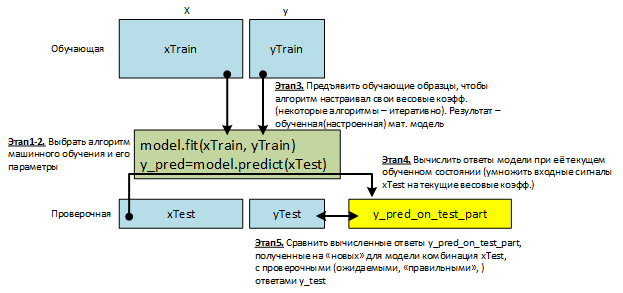

In [ ]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 1    # начальное состояние генератора случ. чисел

X_train, X_test, y_train, y_test = train_test_split(
    images,                     # исходные данные X
    labels,                     # исходные данные y
    test_size    = valid_size,  # доля тестовой части в выборке
    random_state = rand_seed,   # начальное состояние генератора случ. чисел
    shuffle=True,               # перемешивание
    stratify=labels,            # параметр для равномерного разделения
)

In [ ]:
print ("Кол-во образцов: "
       "\n  X_train : {:>3}, y_train {:>3} "
       "\n  X_test  : {:>3}, y_test  {:>3} "
       "\n  X всего : {:>3}, y всего {:>3} ".format  (
    len(X_train), len(y_train),
    len(X_test),  len(y_test),
    len(X_train)+len(X_test), len(y_train)+len(y_test),
))

### Осмотр изображений сформированного набора

In [ ]:
def plotSetOfImages(dataArray, labelsArray):
    ''' Вывод изображений набора в графическом виде '''
    maxColInRow = 8
    nrows = dataArray.shape[0]//maxColInRow
    if dataArray.shape[0]%maxColInRow !=0:     nrows += 1
    plt.figure(figsize=(15, nrows*2 ))        # создать полотно для рисования, figsize-размер в дюймах

    for i in range(0, dataArray.shape[0]):
        plt.subplot(nrows, maxColInRow, i+1) # раметить полотно сеткой-ячейками
        plt.axis(False)
        plt.imshow( # отобразить массив как изображение
            dataArray[i],  # данные для отображения
            cmap='gray'    # название цветовой шкалы
          )
        plt.title(f"№{i},y={class_names[labelsArray[i]][0:4]}")
        plt.subplots_adjust(wspace=0.1, hspace=0.5)

In [ ]:
print("Обучающая часть.")
print(y_train)

print(f"Изображений в наборе {y_train.shape[0]}:")
for class_label, count in zip (*np.unique(y_train, return_counts=True)):
    print(f'  Класс_{class_label}, кол-во {count:>3} шт.' )

# Вывод изображений набора в графическом виде
plotSetOfImages(X_train, y_train)

In [ ]:
print("Проверочная часть.")
print(y_test)

print(f"Изображений в наборе {y_test.shape[0]}:")
for class_label, count in zip (*np.unique(y_test, return_counts=True)):
    print(f'  Класс_{class_label}, кол-во {count:>3} шт.' )

# Вывод изображений набора в графическом виде
plotSetOfImages(X_test, y_test)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Кодирование меток классов "one-hot encoded"

В данный момент метки класса каждого изображения находится в общем списке в виде целочисленных значений

In [ ]:
y_train

In [ ]:
y_test

Для дальнейшей работы нам потребуется сформировать отдельный признак-столбец для каждого уникального класса с информацией о принадлежности к соответствующему классу.  Нужное преобразование выполняет функция `tf.keras.utils.to_categorical()`

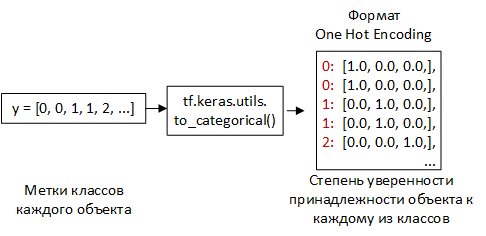

In [ ]:
y_train =  tf.keras.utils.to_categorical(y_train)
y_test  =  tf.keras.utils.to_categorical(y_test)

print("y_train", y_train.shape)
print(y_train[:3])
print()
print("y_test", y_test.shape)
print(y_test[:3])

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Работа с нейронной сетью

### Создание НС. Создание структуры и выбор начальных параметров

Для определения параметров входного слоя важно осмотреть формат массива входных данных. Команда `X_train.shape` возвращает "форму" многомерного массива (N, h, w), где каждое измерение имеет следующее значение:
-  N - кол-во образцов,20: первое число - кол-во изображений в наборе;
-  h и w - кол-во пикселей высоты и ширины каждого изображения.


In [ ]:
print("X_train", X_train.shape)

Осмотрим массив меток класса, для каждого изображения указаны группа значений в столбцах. Их можно интерпретировать как степень уверенности в принадлежности к тому или иному классу, при этом нумерация столбцов идёт слева на право и соответствует меткам класса.

Так содержимое строки `[0., 1., 0.]` следует интерпретировать как:
 - 0% уверенности в принадлежности к классу_0;
 - 100% уверенности в принадлежности к классу_1;
 -  0% уверенности в принадлежности к классу_2 и т.д.

Обратите внимание, что выходной слой нейросети в этом случае также должен иметь три выхода.

In [ ]:
print("y_train", y_train.shape)
ydim=y_train.shape[1]
y_train

Создадим структуру многослойной нейронной сети по примеру в начале работы. Основными отличиями будут:
- размер входного слоя `Input` равный размерности изображения (h x w)
- наличие особого слоя `Flatten`, задача которого развернуть двумерный массив изображения в одномерный вектор
- наличие большего кол-ва скрытых слоёв и большего кол-ва нейронов на каждом из них
- определённое кол-во нейронов на выходном слое, равное кол-ву различаемых классов
- наличие последнего слоя `Activation` с функцией `softmax` для преобразования ответов всех выходных нейронов НС в вероятности принадлежности к классам, так, чтобы сумма всех вероятностей = 1.0

In [ ]:
mp1 = tf.keras.Sequential()
mp1.add(tf.keras.layers.Input(shape=(28,28)))

# Слой для преобразование изображения в одномерный вектор -----------------------
mp1.add(tf.keras.layers.Flatten())
mp1.add(tf.keras.layers.Dense(units=128, activation=None))
mp1.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp1.add(tf.keras.layers.Dense(units=64, activation=None))
mp1.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp1.add(tf.keras.layers.Dense(units= 32, activation= None))
mp1.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp1.add(tf.keras.layers.Dense(units=16, activation= None))
mp1.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))

mp1.add(tf.keras.layers.Dense(units=ydim, activation=None))
# Softmax преобразует ответы всех выходных НС в вероятности принадлежности к классам, сумма всех вероятностей = 1.0
mp1.add(tf.keras.layers.Activation(activation=tf.keras.activations.softmax))

In [ ]:
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]

In [ ]:
totalHistoryLossTrain=list()
totalHistoryLossTest=list()
globalEpochCounter=1

mp1.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

print("Вывод короткой информации о структуре НС")
mp1.summary()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Обучение НС

Перед процедурой обучения осмотрим параметр `.input.shape`  у входного слоя НС - ожидаемая размерность матрицы входных параметров X

In [ ]:
mp1.layers[0].input.shape

Значение `input.shape` равное (None, 28, 28) соответствует массиву неограниченного  кол-ва отдельных изображений 28 x 28 пикселей

Получим кол-во изображений в исходном наборе

In [ ]:
X_train.shape[0]

Для обучения используем функцию `model.fit()`, в процессе обучения будут изменяться весовые коэфф. сети так, чтобы входные значения `train_images` приводили к вычислению соответствующей ожидаемой метрики из `train_labels`. Функция `.fit()` имеет ряд [дополнительных параметров](https://keras.io/api/models/model_training_apis/#fit-method)

Jбучение проходит последовательно по каждому отдельному изображению из набора и на кажой эпохе НС предъявляется единственное изображение для обучения. Данный подход будет не эффективен в реальных задачах и используется для наглядности процесса.

In [ ]:
for index in range(0, X_train.shape[0]):
    print(f"Обучение на образце №{index}  y={y_train[index]}")

    # получение массива пикселей выбранного единственного изображения
    singleImg_X = X_train[index]
    singleImg_y = y_train[index]
    # переупаковка единственного изображения для подачи на вход НС
    singleImg_X = singleImg_X.reshape(1, 28, 28)      # (высота_изображения, ширина_изображения) -> (1, высота_изображения, ширина_изображения)
    singleImg_y = np.expand_dims(singleImg_y, axis=0) # (кол-во_классов, ) -> (1, кол-во_классов)

    history = mp1.fit(
        x=singleImg_X,
        y=singleImg_y,
        epochs=1,
        batch_size=1,
        verbose=1,
        validation_data=[X_test, y_test]
    )

    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Осмотрим измерения оценки ошибок в ответах модели (значение выбранной функции потерь Loss).

In [ ]:
plt.figure(figsize=(14,5)) # создать полотно для рисования, figsize-размер в дюймах
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений оценки потерь (LossVal)")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")
plt.grid()

### Опрос НС одиночными изображениями

Получим кол-во изображений в проверочном наборе `X_test`

In [ ]:
X_test.shape[0]

Выберем номер изображения для проверки и укажем  его номер в переменной `index`.

Далее, по примеру выше, извлечём единственное изображение из набора данных и поместим его в переменную `singleImg_X`.

In [ ]:
def getImage(index : int):
    print(f'Выбрано изображение № {index} из {X_test.shape[0]}')
    singleImg_X = X_test[index]
    singleImg_y = y_test[index]
    print("Размер изображения:", singleImg_X.shape)

    plt.figure(figsize=(2.5,2.5))
    plt.imshow(singleImg_X, cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.axis(True)
    plt.title(f"Номер изобр.={index}, Фактический класс: y={singleImg_y}")
    plt.show()

In [ ]:
index=randint(0, X_test.shape[0]-1)
getImage(index)

Для получения ответа от НС используется ф-ия `model.predict(x_array)`, которая ожидает на вход массив из одного или нескольких элементов.
Важным моментом при работе является, то что НС ожидает на вход массив из одного и более изображений, поэтому используем команду `singleImg_X.reshape(1, 28, 28)` для переупаковки значений в массиве и обеспечения совместимости размерностей.

In [ ]:
def predictImage(model, index : int):
    singleImg_X = X_test[index].reshape(1, 28, 28)
    singleImg_y = y_test[index]
    # Опрос модели
    # Переупаковка единственного изображения для подачи на вход НС
    # (28, 28) -> (1, 28, 28)
    print("Размер изображения:", singleImg_X.shape)
    print("Размер массива y с ожидаемым ответом:", singleImg_y.shape)
    y_pred = model.predict(singleImg_X)
    print()
    print(f'Ожидаемый ответ: {singleImg_y}')
    print(f'Ответ НС: {y_pred}')

    print('Вероятность принадлежности к каждому классу:')
    for i, probability in enumerate(y_pred[0]):
        print(f'  Класс_{class_names[i]}: вероятность {probability:>7.1%}' )

In [ ]:
predictImage(mp1, index)

### Оценка общей точности

Для получения множества ответов от НС также используется ф-ция `model.predict(x_array)`, которая ожидает на вход массив из одного или нескольких изображений. На этот раз передадим весь объект `X_test`  на вход функции, т.е. все имеющиеся изображения и получим ответ по каждому из них.

In [ ]:
X_test.shape

In [ ]:
def overallPredict(model, X_test):
    # Опрос модели
    print('Вычисление ответов - вызов model.predict(X)')
    y_pred_all = model.predict(X_test)

    print(f'\nОтветы модели (вероятности принадлежности) на все предъявленные образцы:')
    #print(y_pred_all) # Вывод сырых значений
    print(np.array2string(y_pred_all, 
                        formatter={'float_kind':lambda x: f"{x:>7.2%}"}, 
                        suppress_small=True))
    return y_pred_all

In [ ]:
y_pred_all_1=overallPredict(mp1, X_test)

Для заключения об общей точности модели необходимо сравнить вычисленные НС и ожидаемые ответы.
Получим массив `y_pred_all_labels` с заключениями о принадлежности каждого изображения к определённому классу, каждый элемент массива будет являться номером класса на основе значения макс. вероятности. Функция `tf.argmax` определяет для каждого образца индекс наибольшего значения в векторе вероятностей принадлежности.   

In [ ]:
def predictedClasses(y_pred_all):
    print(f'\nВычисленный y:\nПолучить из вероятностей заключения (номер класса с максимальной вероятностью)')
    y_pred_all_labels = tf.argmax(y_pred_all, axis=1)
    print(y_pred_all_labels)
    return y_pred_all_labels

In [ ]:
y_pred_all_labels=predictedClasses(y_pred_all_1)

Схожим образом получим массив `y_test_all_labels` с информацией об ожидаемых (проверочных) ответах.

In [ ]:
y_test_all_labels=predictedClasses(y_test)

Одним из способов оценки точности моделей в задачах классификации является построение матрицы соответствия вычисленных ответов НС `y_pred_all` ожидаемым `y_test` в графическом виде - построение **матрицы ошибок (confusion matrix)**. По осям матрицы находятся возможные метки классов. На горизонтальной оси - метки вычисленные НС. На вертикальной оси - ожидаемые метки с правильными ответами. В каждой ячейке указано кол-во образцов с соответствующей комбинацией ответов. Идеальным вариантом является заполнение диагонали матрицы.

In [ ]:
def conf_m(y_pred_all, y_pred_all_labels, y_test_all_labels):
  cm = tf.math.confusion_matrix(
      labels      =y_test_all_labels, # ожидаемые/проверочные метки классов
      predictions =y_pred_all_labels,  # вычисленные метки классов
  )
  print(cm)

  # Отобразить матрицу ошибок в графическом виде
  plt.figure(figsize=[4,4])
  sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14}, square = True)
  plt.xlabel('Вычисленный класс')
  plt.ylabel('Ожидаемый (факт-ий) класс')
  plt.title('Матрица ошибок')
  plt.show()

  print ('Вывести информацию о соответствии классов проверочных образцов')
  for i, (y_test_val, y_pred_val ) in enumerate (
                                        zip (  y_test_all_labels.numpy(),
                                              y_pred_all_labels.numpy())
                                      ):
    print(f'  Изобр. № {i}, Фактический Класс_{y_test_val}, Вычисленный Класс_{y_pred_val} вероятность {y_pred_all[i][y_pred_val]:.2%} ',end='')
    if y_test_val!=y_pred_val:
      print('!!!Ошибка!!!',end='')
    print()


In [ ]:
conf_m(y_pred_all_1, y_pred_all_labels, y_test_all_labels)

### Опрос модели прямым вводом изображений

Выполнение следующей команды создаст и отобразит графическое окно.
При нажатии на кнопку "Распознать" содержимое окна будет преобразовано и передано на вход НС для выполнения классификации.  

Выполнение следующей команды создаст и отобразит графическое окно. Эта команда является блокирующей дальнейшее выполнение кода. **Обязательно закройте графическое окно** перед выполнением дальнейших команд.

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp1,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

Данная модель почти всегда склоняется отвечать классом 2. Те же, что даны далее, отвечают с большой долей уверенности правильно

### Полное обучение

In [ ]:
mp2 = tf.keras.Sequential()
mp2.add(tf.keras.layers.Input(shape=(28,28)))

# Слой для преобразование изображения в одномерный вектор -----------------------
mp2.add(tf.keras.layers.Flatten())
mp2.add(tf.keras.layers.Dense(units=128, activation=None))
mp2.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp2.add(tf.keras.layers.Dense(units=64, activation=None))
mp2.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp2.add(tf.keras.layers.Dense(units= 32, activation= None))
mp2.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp2.add(tf.keras.layers.Dense(units=16, activation= None))
mp2.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))

mp2.add(tf.keras.layers.Dense(units=ydim, activation=None))
# Softmax преобразует ответы всех выходных НС в вероятности принадлежности к классам, сумма всех вероятностей = 1.0
mp2.add(tf.keras.layers.Activation(activation=tf.keras.activations.softmax))

In [ ]:
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]

In [ ]:
mp2.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

In [ ]:
history = mp2.fit(
    x=X_train,
    y=y_train,
    batch_size=1,
    epochs=5,
    verbose=1,
    validation_data=[X_test, y_test]
)

In [ ]:
def plotHistory(history):
    plt.figure(figsize=(14,5)) # создать полотно для рисования, figsize-размер в дюймах
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title("История изменений оценки потерь (LossVal)")
    plt.ylabel("Оценка потерь")
    plt.xlabel("Эпохи обучения")
    plt.grid()

In [ ]:
plotHistory(history)

In [ ]:
y_pred_all_2=overallPredict(mp2, X_test)

In [ ]:
y_pred_all_labels=predictedClasses(y_pred_all_2)

In [ ]:
y_test_all_labels=predictedClasses(y_test)

In [ ]:
conf_m(y_pred_all_2, y_pred_all_labels, y_test_all_labels)

In [ ]:
getImage(16)

In [ ]:
predictImage(mp2, 16)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp2,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

### Простая структура сети

In [ ]:
mp3 = tf.keras.Sequential()
mp3.add(tf.keras.layers.Input(shape=(28,28)))

mp3.add(tf.keras.layers.Flatten())
mp3.add(tf.keras.layers.Dense(units=128, activation=None))
mp3.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))
mp3.add(tf.keras.layers.Dense(units=16, activation= None))
mp3.add(tf.keras.layers.Activation(activation=tf.keras.activations.relu))

mp3.add(tf.keras.layers.Dense(units=ydim, activation=None))
mp3.add(tf.keras.layers.Activation(activation=tf.keras.activations.softmax))

In [ ]:
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]

In [ ]:
mp3.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

In [ ]:
history = mp3.fit(
    x=X_train,
    y=y_train,
    batch_size=1,
    epochs=80,
    verbose=1,
    validation_data=[X_test, y_test]
)

In [ ]:
plotHistory(history)

In [ ]:
y_pred_all_3=overallPredict(mp2, X_test)

In [ ]:
y_pred_all_labels=predictedClasses(y_pred_all_3)
y_test_all_labels=predictedClasses(y_test)
conf_m(y_pred_all_3, y_pred_all_labels, y_test_all_labels)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp3,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

### Простейшая структура сети

In [ ]:
mp4 = tf.keras.Sequential()
mp4.add(tf.keras.layers.Input(shape=(28,28)))

mp4.add(tf.keras.layers.Flatten())

mp4.add(tf.keras.layers.Dense(units=ydim, activation=None))
mp4.add(tf.keras.layers.Activation(activation=tf.keras.activations.softmax))

In [ ]:
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]

In [ ]:
mp4.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

In [ ]:
history = mp4.fit(
    x=X_train,
    y=y_train,
    batch_size=1,
    epochs=80,
    verbose=1,
    validation_data=[X_test, y_test]
)

In [ ]:
plotHistory(history)

In [ ]:
y_pred_all_4=overallPredict(mp4, X_test)

In [ ]:
y_pred_all_labels=predictedClasses(y_pred_all_4)
y_test_all_labels=predictedClasses(y_test)
conf_m(y_pred_all_4, y_pred_all_labels, y_test_all_labels)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp4,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

### Промежуточная сеть на 128 узлов

In [ ]:
mp5 = tf.keras.Sequential()
mp5.add(tf.keras.layers.Input(shape=(28,28)))
mp5.add(tf.keras.layers.Flatten())
mp5.add(tf.keras.layers.Dense(units=128, activation=None))
mp5.add(tf.keras.layers.Dense(units=ydim, activation=None))
mp5.add(tf.keras.layers.Activation(activation=tf.keras.activations.softmax))

In [ ]:
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]

In [ ]:
mp5.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

In [ ]:
history = mp5.fit(
    x=X_train,
    y=y_train,
    batch_size=10,
    epochs=50,
    verbose=1,
    validation_data=[X_test, y_test]
)

In [ ]:
plotHistory(history)

In [ ]:
y_pred_all_5=overallPredict(mp5, X_test)

In [ ]:
y_pred_all_labels=predictedClasses(y_pred_all_5)
y_test_all_labels=predictedClasses(y_test)
conf_m(y_pred_all_5, y_pred_all_labels, y_test_all_labels)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp5,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

In [ ]:
getImage(20)
predictImage(20)

### Сложная структура сети

In [ ]:
mp6 = tf.keras.Sequential()
mp6.add(tf.keras.layers.Input(shape=(28,28)))
mp6.add(tf.keras.layers.Flatten())
mp6.add(tf.keras.layers.Dense(units=1024, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=512, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu))
mp6.add(tf.keras.layers.Dense(units=ydim, activation=tf.keras.activations.softmax))
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]
mp6.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

In [ ]:
totalHistoryLossTrain=list()
totalHistoryLossTest=list()
globalEpochCounter=1

for index in range(0, X_train.shape[0]):
    singleImg_X = X_train[index]
    singleImg_y = y_train[index]
    singleImg_X = singleImg_X.reshape(1, 28, 28)      # (высота_изображения, ширина_изображения) -> (1, высота_изображения, ширина_изображения)
    singleImg_y = np.expand_dims(singleImg_y, axis=0) # (кол-во_классов, ) -> (1, кол-во_классов)

    history = mp6.fit(
        x=singleImg_X,
        y=singleImg_y,
        epochs=1,
        batch_size=1,
        verbose=1,
        validation_data=[X_test, y_test]
    )

    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

In [ ]:
plt.figure(figsize=(14,5)) # создать полотно для рисования, figsize-размер в дюймах
plt.plot(totalHistoryLossTrain, label='train') # нанести на полотно график-линию
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений оценки потерь (LossVal)")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")
plt.grid()

In [ ]:
y_pred_all_6=overallPredict(mp6, X_test)
y_pred_all_labels=predictedClasses(y_pred_all_6)
y_test_all_labels=predictedClasses(y_test)
conf_m(y_pred_all_6, y_pred_all_labels, y_test_all_labels)

Обучим такую же сеть полноценно

In [ ]:
mp7 = tf.keras.Sequential()
mp7.add(tf.keras.layers.Input(shape=(28,28)))
mp7.add(tf.keras.layers.Flatten())
mp7.add(tf.keras.layers.Dense(units=1024, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=512, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu))
mp7.add(tf.keras.layers.Dense(units=ydim, activation=tf.keras.activations.softmax))
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]
mp7.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

In [ ]:
history = mp7.fit(
    x=X_train,
    y=y_train,
    epochs=80,
    batch_size=1,
    verbose=1,
    validation_data=[X_test, y_test]
)

In [ ]:
plotHistory(history)

In [ ]:
y_pred_all_7=overallPredict(mp7, X_test)
y_pred_all_labels=predictedClasses(y_pred_all_7)
y_test_all_labels=predictedClasses(y_test)
conf_m(y_pred_all_7, y_pred_all_labels, y_test_all_labels)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp7,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

In [ ]:
mp8 = tf.keras.Sequential()
mp8.add(tf.keras.layers.Input(shape=(28,28)))
mp8.add(tf.keras.layers.Flatten())
mp8.add(tf.keras.layers.Dense(units=128, activation=None))
mp8.add(tf.keras.layers.Dense(units=64, activation=None))
mp8.add(tf.keras.layers.Dense(units=32, activation=None))
mp8.add(tf.keras.layers.Dense(units=16, activation=None))
mp8.add(tf.keras.layers.Dense(units=ydim, activation=tf.keras.activations.softmax))
fLoss = tf.keras.losses.CategoricalCrossentropy()
fOptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

fMetric =   [
              tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Precision(),
            ]
mp8.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = fMetric
)

### Сеть без функции активации

In [ ]:
history = mp8.fit(
    x=X_train,
    y=y_train,
    epochs=80,
    batch_size=1,
    verbose=1,
    validation_data=[X_test, y_test]
)

In [ ]:
plotHistory(history)

In [ ]:
y_pred_all_8=overallPredict(mp8, X_test)
y_pred_all_labels=predictedClasses(y_pred_all_8)
y_test_all_labels=predictedClasses(y_test)
conf_m(y_pred_all_8, y_pred_all_labels, y_test_all_labels)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=mp8,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

### Сверточная сеть

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)

cdn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # 3. ПЕРВЫЙ СВЕРТОЧНЫЙ БЛОК 
    # Ищет простые линии (32 разных фильтра)
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Сжимает картинку, оставляя главное
    
    # 4. ВТОРОЙ СВЕРТОЧНЫЙ БЛОК
    # Ищет сложные формы (сочетания линий)
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 5. ПЕРЕХОД К КЛАССИФИКАЦИИ
    tf.keras.layers.Flatten(),
    
    # Полносвязный слой для принятия решения
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), # Защита от зубрежки
    tf.keras.layers.Dense(ydim, activation='softmax')
])

cdn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cdn.fit(
    x=X_train,          # Сразу весь массив (126, 28, 28, 1)
    y=y_train,          # Сразу все метки
    epochs=200,         # 200 эпох хватит, чтобы увидеть крутой результат
    batch_size=32,      # Обязательно батч 32! Это даст стабильный градиент
    validation_data=(X_test, y_test),
    shuffle=True,       # Это заставит сеть саму перемешивать символы каждую эпоху
    verbose=1
)

In [ ]:
plotHistory(history)

In [ ]:
y_pred_cdn=overallPredict(cdn, X_test)
y_pred_labels=predictedClasses(y_pred_cdn)
y_test_labels=predictedClasses(y_test)
conf_m(y_pred_cdn, y_pred_labels, y_test_labels)

ошибочные изображения

In [ ]:
getImage(25)
getImage(27)
predictImage(cdn, 25)
predictImage(cdn, 27)

In [ ]:
myWinTK (
    imgW=28, ImgH=28,      # размер поля для создания изображения
    modelTensorflow=cdn,   # передать в качестве параметра обученную модель НС TensorFlow
    classNames=class_names,# список названий классов
)

# Выводы

По результатам экспериментов наблюдается следующее. Проведе-ние обучения «по шагам» вредит точности модели — следует обучать сра-зу на все планируемые эпохи. Явления перетренировки не наблюдается (даже при 5000 эпох). Выход на плато достигается при числе эпох равном 10–40 в зависимости от сложности модели (сложнее — раньше).

Самые точные модели — самая сложная и самая простая из воз-можных. Усложнение модели не вызывает изменений. Предположительно, такие результаты есть следствие однородности датасета: изображения внутри класса сильно похожи, символы занимают специфичные клетки.

Отсутствие видимого влияния функции активации говорит о том, что зависимость класса от занятых ячеек вовсе может быть линейна.
